In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

%matplotlib inline

In [2]:
master = pd.read_csv('TFT_Master_MatchData.csv')

In [3]:
master.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4242528808,2233.449951,8,37,1,2225.243408,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [12], 'star': 3}, 'Sona..."
1,KR_4242528808,2233.449951,9,37,2,2225.243408,"{'Blaster': 2, 'Chrono': 1, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
2,KR_4242528808,2233.449951,8,35,3,2138.763428,"{'Blaster': 3, 'Chrono': 2, 'Cybernetic': 1, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
3,KR_4242528808,2233.449951,8,33,4,2003.865967,"{'Chrono': 2, 'Cybernetic': 2, 'DarkStar': 2, ...","{'Leona': {'items': [], 'star': 2}, 'Mordekais..."
4,KR_4242528808,2233.449951,7,31,5,1885.395386,"{'Blaster': 1, 'DarkStar': 1, 'Demolitionist':...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."


In [4]:
master.isnull().sum()

gameId            0
gameDuration      0
level             0
lastRound         0
Ranked            0
ingameDuration    0
combination       0
champion          0
dtype: int64

### 게임 소요 시간
#### - 최소 3분, 평균 36분, 최대 46분

In [5]:
master_time = round(master.gameDuration.agg(['min','mean','max']).to_frame() / 60)
master_time.columns = ['gameDuration (min)']
master_time

,gameDuration (min)
min,3.0
mean,36.0
max,46.0


### 전체 순위

In [6]:
combinations = master.combination.apply(lambda x: re.findall('[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
combinations

,combination
0,"[DarkStar, Protector, Rebel, Set3_Celestial, S..."
1,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
2,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
3,"[Chrono, Cybernetic, DarkStar, Infiltrator, Ma..."
4,"[Blaster, DarkStar, Demolitionist, Infiltrator..."
...,...
79994,"[Chrono, Cybernetic, DarkStar, Set3_Sorcerer, ..."
79995,"[Chrono, DarkStar, ManaReaver, Protector, Set3..."
79996,"[Chrono, Cybernetic, DarkStar, Infiltrator, Re..."
79997,"[Protector, Rebel, Set3_Blademaster, Set3_Cele..."


In [7]:
all_combi = Counter()
for combi in combinations.combination:
    all_combi += Counter(combi)

all_combi

Counter({'DarkStar': 38065,
         'Protector': 19490,
         'Rebel': 31297,
         'Set3_Celestial': 36416,
         'Set3_Mystic': 29122,
         'StarGuardian': 21468,
         'Blaster': 34478,
         'Chrono': 52673,
         'Cybernetic': 41997,
         'Mercenary': 24261,
         'Set3_Blademaster': 31168,
         'Set3_Brawler': 33493,
         'Set3_Void': 31730,
         'Valkyrie': 35503,
         'Starship': 4340,
         'Infiltrator': 26535,
         'ManaReaver': 32383,
         'Sniper': 20483,
         'SpacePirate': 29582,
         'Vanguard': 39983,
         'Demolitionist': 16220,
         'MechPilot': 12665,
         'Set3_Sorcerer': 27961,
         'TemplateTrait': 13971})

#### - 전체 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. Vanguard(선봉대)

In [8]:
all_combi = pd.DataFrame.from_dict(all_combi, orient='index', columns=['Count']).reset_index()
all_combi = all_combi.sort_values(['Count'], ascending=False)
all_combi.columns = ['Combination','Count']
all_combi = all_combi.reset_index(drop=True)
all_combi

,Combination,Count
0,Chrono,52673
1,Cybernetic,41997
2,Vanguard,39983
3,DarkStar,38065
4,Set3_Celestial,36416
5,Valkyrie,35503
6,Blaster,34478
7,Set3_Brawler,33493
8,ManaReaver,32383
9,Set3_Void,31730


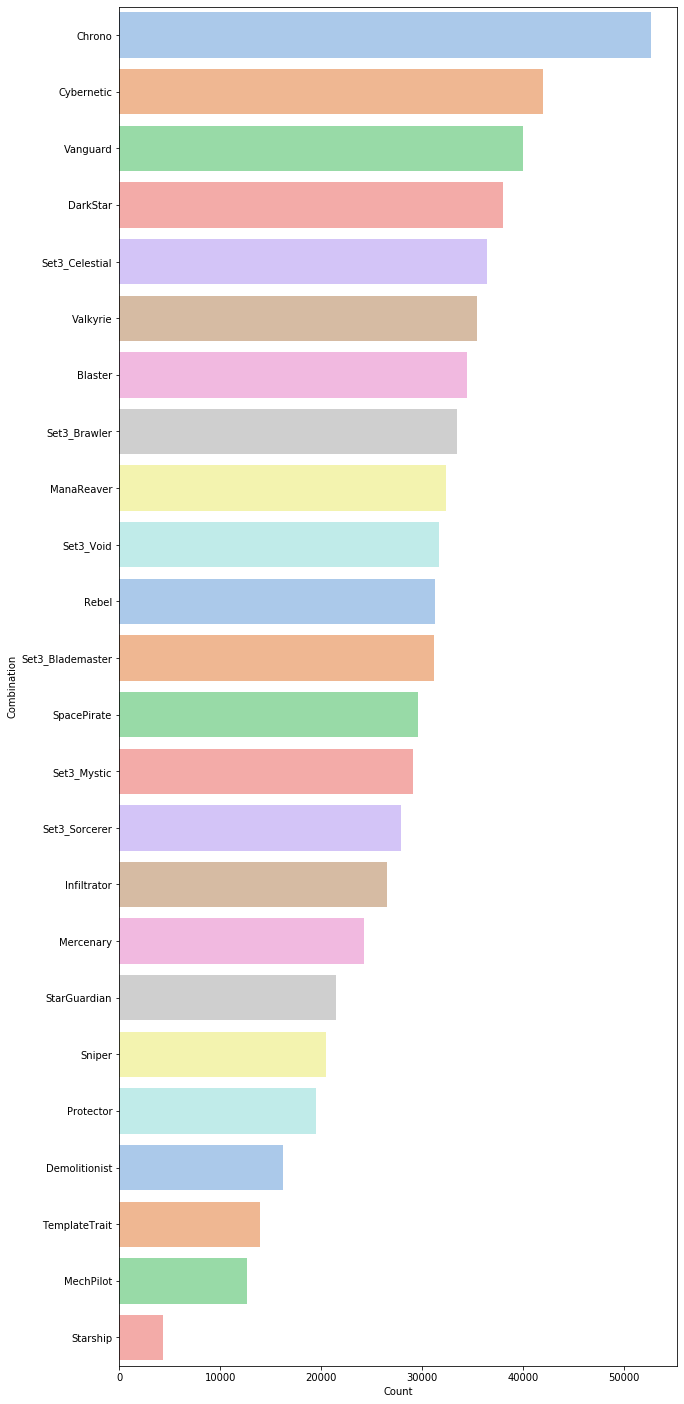

In [9]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Combination', data=all_combi, palette = 'pastel')
plt.show()

#### - 직업 시너지 TOP3: 1. Vanguard(선봉대), 2. Blaster(총잡이), 3. Brawler(싸움꾼)

In [10]:
Classes = all_combi.iloc[[2, 6, 7, 8, 11, 13, 14, 15, 16, 18, 19, 20, 23], :].reset_index(drop=True)
Classes

,Combination,Count
0,Vanguard,39983
1,Blaster,34478
2,Set3_Brawler,33493
3,ManaReaver,32383
4,Set3_Blademaster,31168
5,Set3_Mystic,29122
6,Set3_Sorcerer,27961
7,Infiltrator,26535
8,Mercenary,24261
9,Sniper,20483


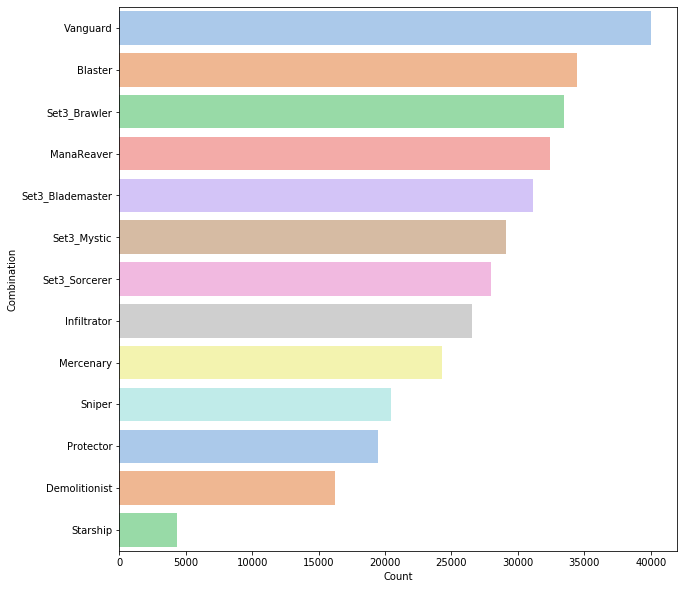

In [11]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=Classes, palette = 'pastel')
plt.show()

#### - 계열 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. DarkStar(암흑의 별)

In [12]:
Origin = all_combi.iloc[[0, 1, 3, 4, 5, 9, 10, 12, 17, 22], :].reset_index(drop=True)
Origin

,Combination,Count
0,Chrono,52673
1,Cybernetic,41997
2,DarkStar,38065
3,Set3_Celestial,36416
4,Valkyrie,35503
5,Set3_Void,31730
6,Rebel,31297
7,SpacePirate,29582
8,StarGuardian,21468
9,MechPilot,12665


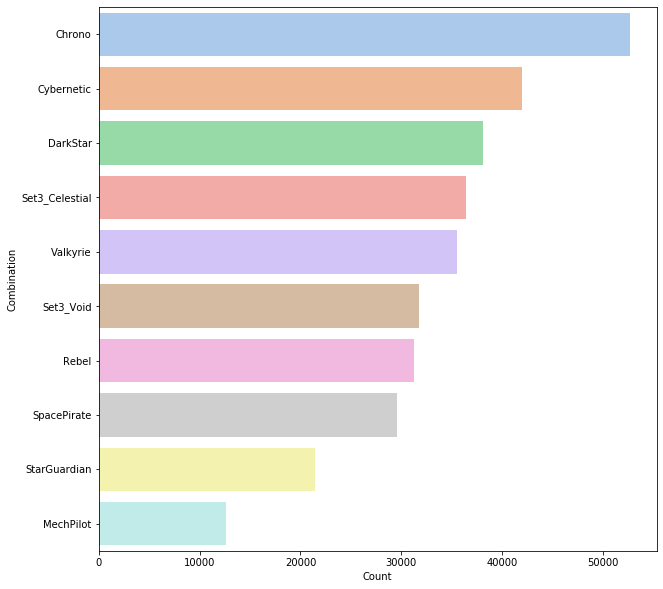

In [13]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=Origin, palette = 'pastel')
plt.show()

#### - 시너지 조합

In [14]:
team_comps = master.combination.value_counts().to_frame()
team_comps.head()

,combination
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",3003
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1}",1265
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Starship': 1, 'Valkyrie': 1}",1124
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'Valkyrie': 1}",894
"{'DarkStar': 1, 'ManaReaver': 2, 'Protector': 2, 'Set3_Celestial': 4, 'Sniper': 2, 'SpacePirate': 2, 'Vanguard': 1}",625


#### - 챔피언 사용 순위 TOP3: 1. Vi(바이), 2. Blitzcrank(블리츠크랭크), 3. Kassadin(카사딘)

In [15]:
champ = master.champion.apply(lambda x: re.findall('[a-zA-Z]+',x)).to_frame()
champ

,champion
0,"[JarvanIV, items, star, Sona, items, star, Rak..."
1,"[Malphite, items, star, Blitzcrank, items, sta..."
2,"[Malphite, items, star, Blitzcrank, items, sta..."
3,"[Leona, items, star, Mordekaiser, items, star,..."
4,"[KhaZix, items, star, KaiSa, items, star, Anni..."
...,...
79994,"[TwistedFate, items, star, Poppy, items, star,..."
79995,"[Darius, items, star, Rakan, items, star, XinZ..."
79996,"[TwistedFate, items, star, Malphite, items, st..."
79997,"[Yasuo, items, star, Sona, items, star, Rakan,..."


In [16]:
all_champ = Counter()
for champ in champ.champion:
    all_champ += Counter(champ)

all_champ

Counter({'JarvanIV': 7177,
         'items': 630279,
         'star': 630279,
         'Sona': 10240,
         'Rakan': 10438,
         'XinZhao': 8161,
         'Neeko': 8020,
         'Karma': 12253,
         'Soraka': 10844,
         'Lulu': 12775,
         'Malphite': 19494,
         'Blitzcrank': 24610,
         'Vi': 25423,
         'Jinx': 17165,
         'ChoGath': 18983,
         'Kayle': 18012,
         'MissFortune': 21200,
         'Ezreal': 22084,
         'AurelionSol': 4322,
         'Leona': 11780,
         'Mordekaiser': 11576,
         'Jayce': 15013,
         'Ashe': 18355,
         'WuKong': 20597,
         'Jhin': 13635,
         'Thresh': 14170,
         'Ekko': 9368,
         'KhaZix': 9406,
         'KaiSa': 10919,
         'Annie': 10555,
         'Shaco': 12251,
         'Rumble': 11234,
         'Fizz': 10673,
         'Ziggs': 1967,
         'Yasuo': 4534,
         'MasterYi': 4468,
         'Gangplank': 4208,
         'Caitlyn': 3359,
         'Graves': 134

In [17]:
all_champ = pd.DataFrame.from_dict(all_champ, orient='index', columns=['Count'])
all_champ = all_champ.drop(['star','items']).reset_index()
all_champ = all_champ.sort_values(['Count'], ascending=False)
all_champ.columns = ['Champ','Count']
all_champ = all_champ.reset_index(drop=True)
all_champ

,Champ,Count
0,Vi,25423
1,Blitzcrank,24610
2,Kassadin,22178
3,Ezreal,22084
4,MissFortune,21200
5,WuKong,20597
6,Malphite,19494
7,ChoGath,18983
8,Ashe,18355
9,Kayle,18012


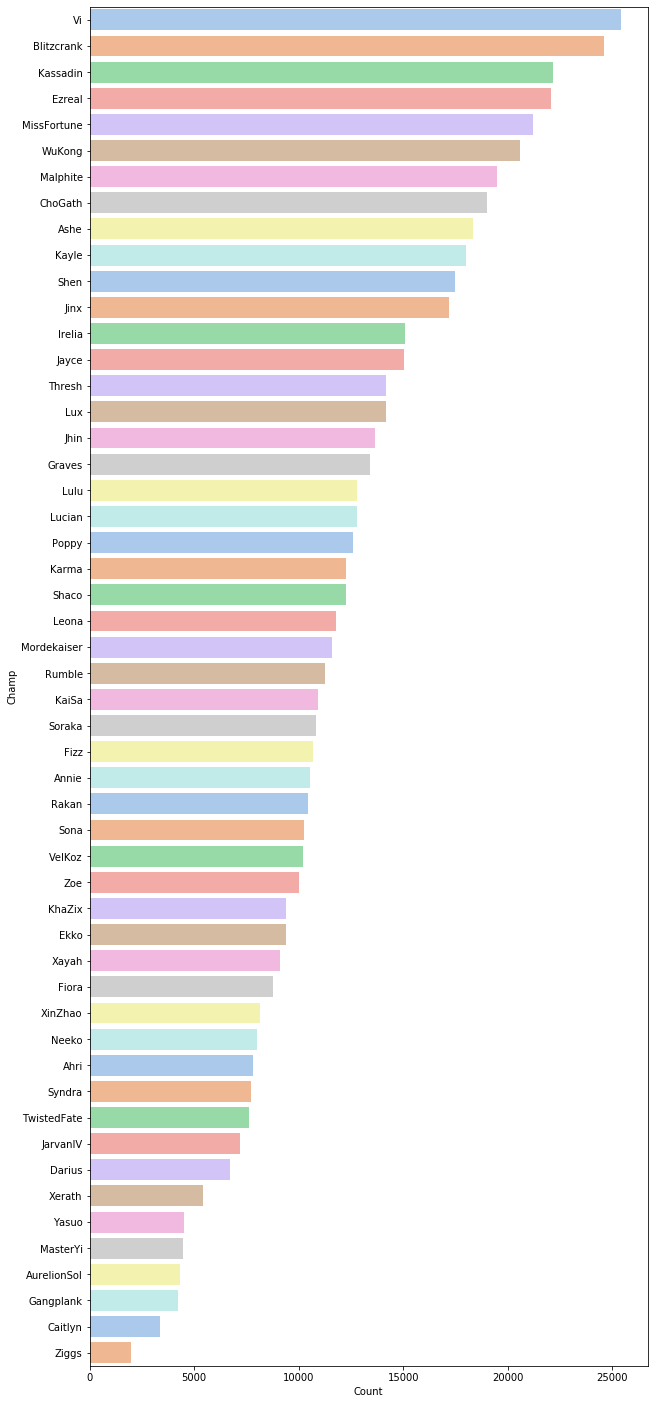

In [18]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Champ', data=all_champ, palette = 'pastel')
plt.show()

### 순위 TOP 4

In [19]:
top4_combi = master[master.Ranked<=4].combination.apply(lambda x: re.findall('[a-zA-Z]+[0-9]?_?[a-zA-Z]+',x)).to_frame()
top4_combi

,combination
0,"[DarkStar, Protector, Rebel, Set3_Celestial, S..."
1,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
2,"[Blaster, Chrono, Cybernetic, Mercenary, Rebel..."
3,"[Chrono, Cybernetic, DarkStar, Infiltrator, Ma..."
8,"[Blaster, Demolitionist, Mercenary, Rebel, Set..."
...,...
79986,"[Chrono, DarkStar, Protector, Set3_Blademaster..."
79991,"[Blaster, Chrono, Cybernetic, ManaReaver, Rebe..."
79992,"[Chrono, Cybernetic, DarkStar, ManaReaver, Pro..."
79993,"[Chrono, DarkStar, Demolitionist, ManaReaver, ..."


In [20]:
top4_all_combi = Counter()
for combi in top4_combi.combination:
    top4_all_combi += Counter(combi)

top4_all_combi

Counter({'DarkStar': 19659,
         'Protector': 9753,
         'Rebel': 16196,
         'Set3_Celestial': 18893,
         'Set3_Mystic': 15516,
         'StarGuardian': 10996,
         'Blaster': 18025,
         'Chrono': 27317,
         'Cybernetic': 22000,
         'Mercenary': 14760,
         'Set3_Blademaster': 15962,
         'Set3_Brawler': 17003,
         'Set3_Void': 16853,
         'Valkyrie': 19484,
         'Starship': 3112,
         'Infiltrator': 13410,
         'ManaReaver': 16725,
         'Sniper': 10060,
         'SpacePirate': 15267,
         'Vanguard': 19160,
         'Demolitionist': 8287,
         'TemplateTrait': 8098,
         'MechPilot': 6420,
         'Set3_Sorcerer': 13637})

#### - 전체 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. DarkStar(암흑의 별)

In [21]:
top4_all_combi = pd.DataFrame.from_dict(top4_all_combi, orient='index', columns=['Count']).reset_index()
top4_all_combi = top4_all_combi.sort_values(['Count'], ascending=False)
top4_all_combi.columns = ['Combination','Count']
top4_all_combi = top4_all_combi.reset_index(drop=True)
top4_all_combi

,Combination,Count
0,Chrono,27317
1,Cybernetic,22000
2,DarkStar,19659
3,Valkyrie,19484
4,Vanguard,19160
5,Set3_Celestial,18893
6,Blaster,18025
7,Set3_Brawler,17003
8,Set3_Void,16853
9,ManaReaver,16725


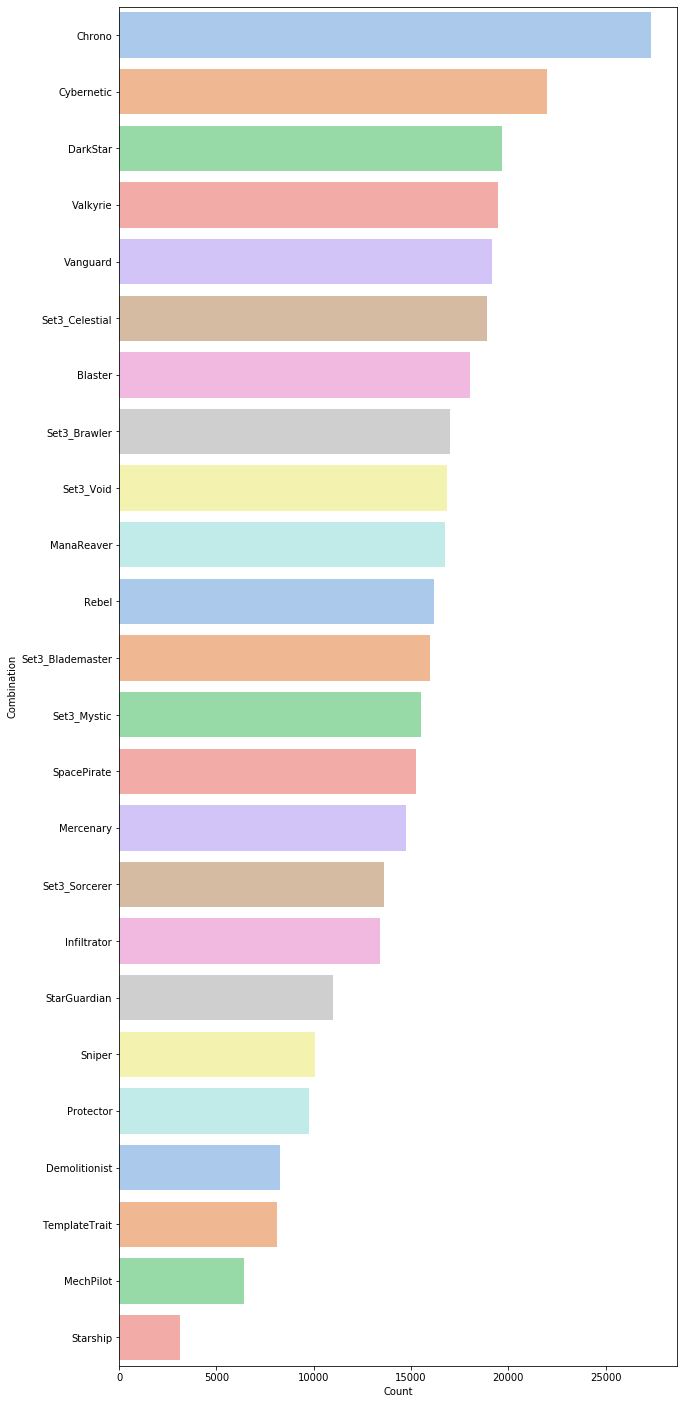

In [22]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Combination', data=top4_all_combi, palette = 'pastel')
plt.show()

#### - 직업 시너지 TOP3: 1. Vanguard(선봉대), 2. Blaster(총잡이), 3. Brawler(싸움꾼)

In [23]:
top4_Classes = top4_all_combi.iloc[[4,6,7,9,11,12,14,15,16,18,19,20,23], :].reset_index(drop=True)
top4_Classes

,Combination,Count
0,Vanguard,19160
1,Blaster,18025
2,Set3_Brawler,17003
3,ManaReaver,16725
4,Set3_Blademaster,15962
5,Set3_Mystic,15516
6,Mercenary,14760
7,Set3_Sorcerer,13637
8,Infiltrator,13410
9,Sniper,10060


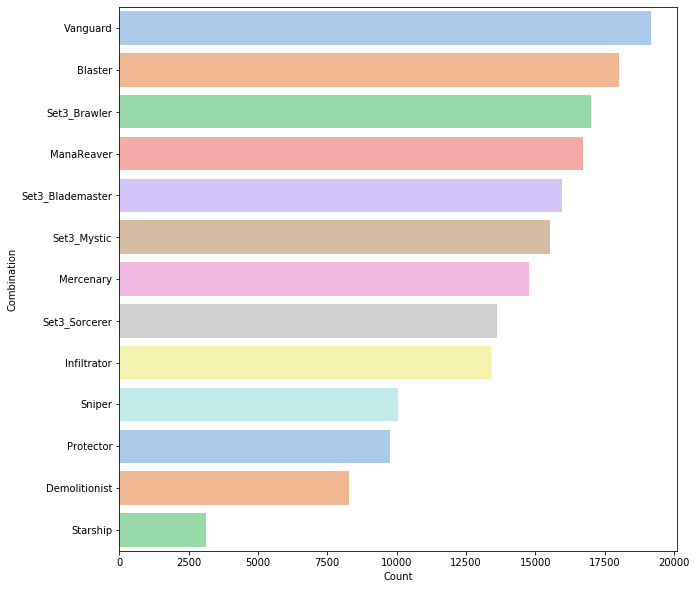

In [24]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=top4_Classes, palette = 'pastel')
plt.show()

#### - 계열 시너지 TOP3: 1. Chrono(시공간), 2. Cybernetic(사이버네틱), 3. DarkStar(암흑의 별)

In [25]:
top4_Origin = top4_all_combi.iloc[[0,1,2,3,5,8,10,13,17,22], :].reset_index(drop=True)
top4_Origin

,Combination,Count
0,Chrono,27317
1,Cybernetic,22000
2,DarkStar,19659
3,Valkyrie,19484
4,Set3_Celestial,18893
5,Set3_Void,16853
6,Rebel,16196
7,SpacePirate,15267
8,StarGuardian,10996
9,MechPilot,6420


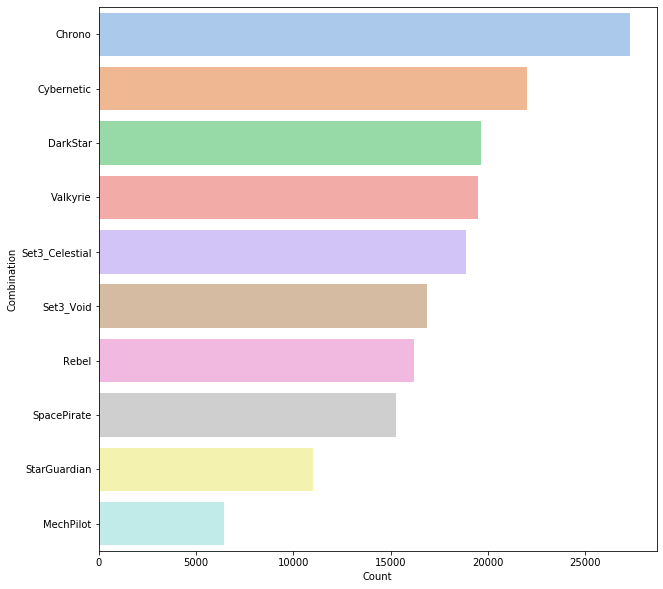

In [26]:
plt.rcParams['figure.figsize'] = (10,10)
sns.barplot(x = 'Count', y = 'Combination', data=top4_Origin, palette = 'pastel')
plt.show()

#### - 시너지 조합

In [27]:
team_comps = master[master.Ranked<=4].combination.value_counts().to_frame()
team_comps.head()

,combination
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",1377
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Starship': 1, 'Valkyrie': 1}",984
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Mercenary': 1, 'Rebel': 2, 'Set3_Brawler': 4, 'Set3_Void': 1, 'Valkyrie': 1}",415
"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, 'Mercenary': 1, 'Rebel': 3, 'Set3_Brawler': 4, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",341
"{'Blaster': 2, 'Chrono': 4, 'ManaReaver': 2, 'Mercenary': 1, 'Set3_Blademaster': 3, 'Set3_Celestial': 2, 'Valkyrie': 2, 'Vanguard': 1}",325


#### - 챔피언 사용 순위 TOP3: 1. Vi(바이), 2. MissFortune(미스포츈), 3. Blitzcrank(블리츠크랭크)

In [28]:
top4_champ = master[master.Ranked<=4].champion.apply(lambda x: re.findall('[a-zA-Z]+',x)).to_frame()
top4_champ

,champion
0,"[JarvanIV, items, star, Sona, items, star, Rak..."
1,"[Malphite, items, star, Blitzcrank, items, sta..."
2,"[Malphite, items, star, Blitzcrank, items, sta..."
3,"[Leona, items, star, Mordekaiser, items, star,..."
8,"[Ziggs, items, star, Malphite, items, star, So..."
...,...
79986,"[Caitlyn, items, star, JarvanIV, items, star, ..."
79991,"[Malphite, items, star, Graves, items, star, B..."
79992,"[Caitlyn, items, star, JarvanIV, items, star, ..."
79993,"[Jayce, items, star, Kassadin, items, star, Ru..."


In [29]:
top4_cham = Counter()
for champ in top4_champ.champion:
    top4_cham += Counter(champ)

top4_cham

Counter({'JarvanIV': 3572,
         'items': 328641,
         'star': 328641,
         'Sona': 4975,
         'Rakan': 5470,
         'XinZhao': 4064,
         'Neeko': 4006,
         'Karma': 6306,
         'Soraka': 6007,
         'Lulu': 8445,
         'Malphite': 10405,
         'Blitzcrank': 12746,
         'Vi': 13583,
         'Jinx': 9294,
         'ChoGath': 10492,
         'Kayle': 9707,
         'MissFortune': 13159,
         'Ezreal': 11674,
         'AurelionSol': 3097,
         'Leona': 5428,
         'Mordekaiser': 5222,
         'Jayce': 7223,
         'Ashe': 9316,
         'WuKong': 10574,
         'Jhin': 6787,
         'Thresh': 8964,
         'Ekko': 5645,
         'Ziggs': 763,
         'MasterYi': 1877,
         'Gangplank': 2331,
         'Yasuo': 1869,
         'Lucian': 5920,
         'KaiSa': 5271,
         'Annie': 5369,
         'Shaco': 5942,
         'Rumble': 5644,
         'Lux': 7694,
         'Fizz': 5584,
         'Poppy': 5939,
         'Kassadin': 

In [30]:
top4_cham = pd.DataFrame.from_dict(top4_cham, orient='index', columns=['Count'])
top4_cham = top4_cham.drop(['star','items']).reset_index()
top4_cham = top4_cham.sort_values(['Count'], ascending=False)
top4_cham.columns = ['Champ','Count']
top4_cham = top4_cham.reset_index(drop=True)
top4_cham

,Champ,Count
0,Vi,13583
1,MissFortune,13159
2,Blitzcrank,12746
3,Ezreal,11674
4,Kassadin,11429
5,WuKong,10574
6,ChoGath,10492
7,Malphite,10405
8,Kayle,9707
9,Ashe,9316


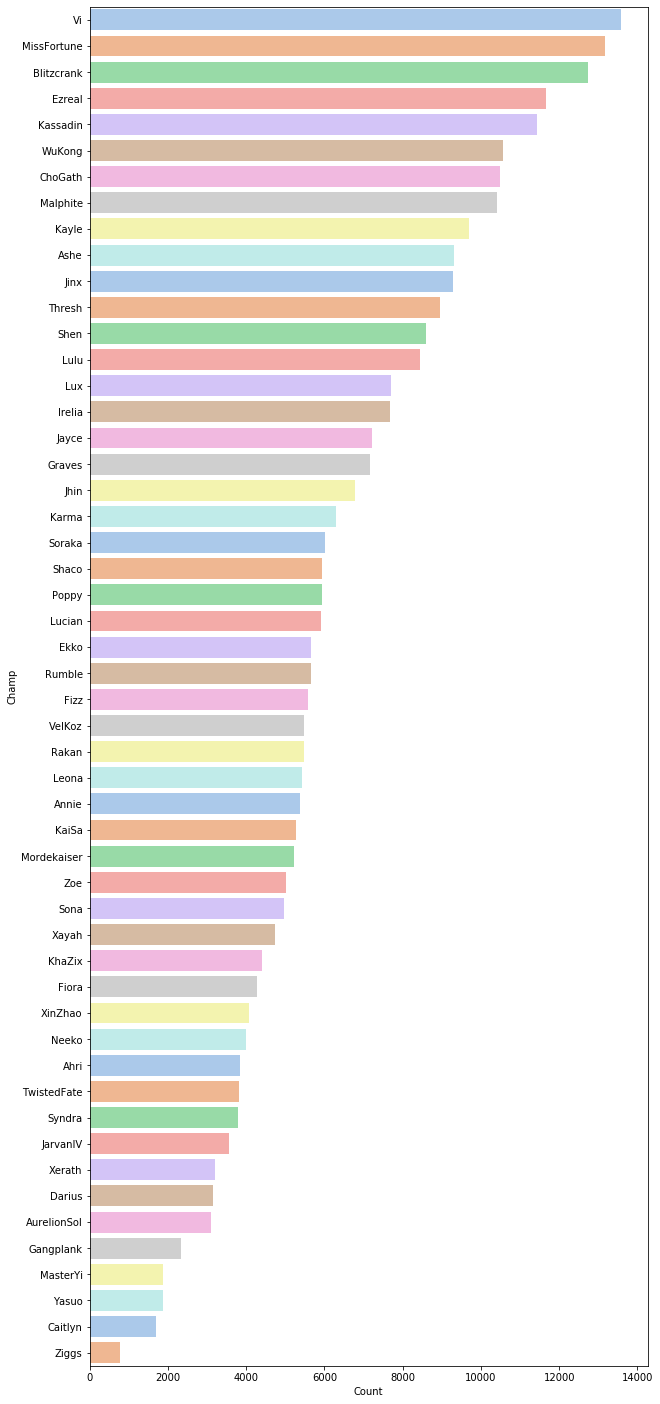

In [31]:
plt.rcParams['figure.figsize'] = (10,25)
sns.barplot(x = 'Count', y = 'Champ', data=top4_cham, palette = 'pastel')
plt.show()